# 多层感知机

In [46]:
from imp import reload
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

import d2l_pytorch.d2l as d2l
reload(d2l)



<module 'd2l_pytorch.d2l' from '..\\d2l_pytorch\\d2l.py'>

In [15]:
def xyplot(x_vals, y_vals, name):
  d2l.set_figsize(figsize=(5, 2.5))
  d2l.plt.plot(x_vals.detach().numpy(),y_vals.detach().numpy())
  d2l.plt.xlabel("x")
  d2l.plt.ylabel(name + "x")


$ReLU(x)=max(x,0)$

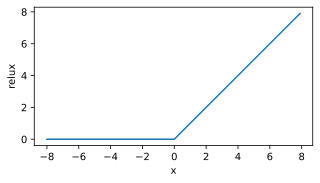

In [23]:
# relu function
x = torch.arange(-8.0,8.0,0.1,requires_grad=True)
y1 = x.relu() 
xyplot(x,y1,"relu")

$sigmodi(x)=\frac{1}{1+\exp(-x)}$

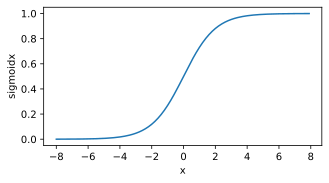

In [41]:
#sigmoid function
y2 = x.sigmoid()
xyplot(x,y2,"sigmoid")

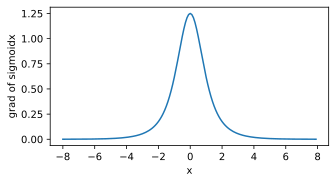

In [42]:
x.grad
y2.sum().backward()
xyplot(x,x.grad,"grad of sigmoid")

$tanh(x)=\frac{1-\exp(-2x)}{1+\exp(-2x)}$

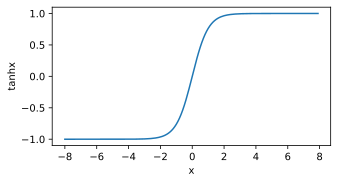

In [39]:
# tanh 函数
y3 = x.tanh()
xyplot(x,y3,"tanh")

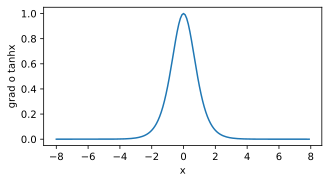

In [40]:
x.grad.zero_()
y3.sum().backward()
xyplot(x,x.grad,"grad o tanh")

In [43]:
# 多层感知机
# 就是含有至少一个隐藏层的由全连接层组成的神经网络，且每个隐藏层的输出通过激活函数进行变换
# 多层感知机的层数和各隐藏层中隐藏单元个数都是超参数

$H=\phi(XW_h+b_h) $

$O=HW_o+b_o$

其中$\phi$ 表示激活函数。
在分类问题中，我们可以对输出$O$做softmax运算，并使用softmax回归中的交叉熵函数。

In [47]:
# 实现多层感知机

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_hiddens)), dtype=torch.float)
b1 = torch.zeros(num_hiddens, dtype=torch.float)
W2 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_outputs)), dtype=torch.float)
b2 = torch.zeros(num_outputs, dtype=torch.float)

params = [W1,b1,W2,b2]
for param in params:
  param.requires_grad_(requires_grad=True)


In [48]:
def relu(X):
  return torch.max(input=X, other=torch.tensor(0.0))


In [51]:

def net(X):
  X = X.view((-1,num_inputs))
  H = relu(torch.matmul(X,W1)+b1)
  return torch.matmul(H,W2)+b2

In [52]:
loss = torch.nn.CrossEntropyLoss()

num_epochs, lr = 5,100.0
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,batch_size,params,lr)

epoch 1 , loss 0.0030 , train acc 0.711, test acc 0.753
epoch 2 , loss 0.0019 , train acc 0.820, test acc 0.828
epoch 3 , loss 0.0017 , train acc 0.844, test acc 0.844
epoch 4 , loss 0.0015 , train acc 0.855, test acc 0.823
epoch 5 , loss 0.0014 , train acc 0.865, test acc 0.809
